In [1]:
## 1) Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
## 3) Understanding the dataset & Preprocessing
dflibrary = pd.read_csv("steam-library.csv")
dfwishlist = pd.read_csv("steam-wishlist.csv")
warnings.filterwarnings('ignore')

In [3]:
dflibrary['hours'].fillna(0, inplace=True)
display(dflibrary.head(10))

,game,id,hours,last_played,metascore,userscore,wilsonscore,sdbrating,userscore_count,release_date,...,warhammer 40k,web publishing,well-written,werewolves,western,wholesome,world war i,world war ii,wrestling,zombies
0,10 Second Ninja X,435790,0.000000,NaN,NaN,84.0,80.0,77.0,220.0,7/19/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Story About My Uncle,278360,0.000000,NaN,73.0,92.0,92.0,90.0,11898.0,5/28/2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Academia : School Simulator,672630,8.783333,NaN,NaN,85.0,84.0,82.0,2421.0,9/8/2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Across the Obelisk,1385380,8.550000,NaN,NaN,85.0,84.0,83.0,8270.0,4/8/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AdVenture Capitalist,346900,2.283333,NaN,NaN,88.0,88.0,87.0,56454.0,3/30/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AdVenture Communist,462930,0.016667,NaN,NaN,65.0,64.0,64.0,4556.0,8/10/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aegis Defenders,371140,0.000000,NaN,76.0,78.0,72.0,72.0,147.0,2/8/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Age of Conquest IV,314970,7.250000,NaN,NaN,81.0,80.0,78.0,2574.0,4/5/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Age of Wonders III,226840,1.100000,NaN,80.0,81.0,80.0,79.0,6696.0,3/31/2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,America's Army: Proving Grounds,203290,0.000000,NaN,NaN,78.0,77.0,76.0,10717.0,10/1/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(dfwishlist.head(10))

,game,id,hours,added,price,metascore,userscore,wilsonscore,sdbrating,userscore_count,...,transportation,turn-based,turn-based combat,turn-based strategy,turn-based tactics,violent,visual novel,war,world war ii,zombies
0,Ni no Kuni™ II: Revenant Kingdom,589360,58.016,11/16/2018,39.99,81.0,83.0,82.0,81.0,7390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Borderlands Game of the Year,8980,39.383,5/20/2022,29.99,81.0,93.0,93.0,91.0,18201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Factorio,427520,98.766,8/3/2021,17.00,90.0,97.0,97.0,96.0,140492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Satisfactory,526870,154.666,8/3/2021,29.99,NaN,97.0,97.0,96.0,130019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dishonored®: Death of the Outsider™,614570,12.005,6/8/2021,17.99,81.0,86.0,85.0,84.0,7947.0,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN
5,Movie Studio Tycoon,630440,0.000,12/29/2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Hell Let Loose,686810,95.667,6/22/2021,13.64,79.0,84.0,84.0,83.0,72732.0,...,NaN,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN
7,TFM: The First Men,700820,8.000,5/30/2023,9.99,NaN,65.0,60.0,62.0,313.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ni no Kuni Wrath of the White Witch™ Remastered,798460,57.567,10/20/2020,32.99,NaN,85.0,84.0,82.0,2954.0,...,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ONE PIECE ODYSSEY,814000,46.100,2/6/2023,39.99,77.0,82.0,81.0,79.0,1945.0,...,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## Data Cleaning and Standardization
dflibrary.iloc[:, 10:] = dflibrary.iloc[:, 10:].replace({pd.NA: 0, 'x': 1})

# Drop the 'last_played' column
dflibrary = dflibrary.drop(columns=['last_played'])
dflibrary['metascore'] = dflibrary['metascore'].fillna((dflibrary['userscore']+dflibrary['wilsonscore'])/2)
# Display the modified DataFrame
display(dflibrary.head(10))

,game,id,hours,metascore,userscore,wilsonscore,sdbrating,userscore_count,release_date,captions available,...,warhammer 40k,web publishing,well-written,werewolves,western,wholesome,world war i,world war ii,wrestling,zombies
0,10 Second Ninja X,435790,0.000000,82.0,84.0,80.0,77.0,220.0,7/19/2016,0,...,0,0,0,0,0,0,0,0,0,0
1,A Story About My Uncle,278360,0.000000,73.0,92.0,92.0,90.0,11898.0,5/28/2014,0,...,0,0,0,0,0,0,0,0,0,0
2,Academia : School Simulator,672630,8.783333,84.5,85.0,84.0,82.0,2421.0,9/8/2017,0,...,0,0,0,0,0,0,0,0,0,0
3,Across the Obelisk,1385380,8.550000,84.5,85.0,84.0,83.0,8270.0,4/8/2021,0,...,0,0,0,0,0,0,0,0,0,0
4,AdVenture Capitalist,346900,2.283333,88.0,88.0,88.0,87.0,56454.0,3/30/2015,0,...,0,0,0,0,0,0,0,0,0,0
5,AdVenture Communist,462930,0.016667,64.5,65.0,64.0,64.0,4556.0,8/10/2016,0,...,0,0,0,0,0,0,0,0,0,0
6,Aegis Defenders,371140,0.000000,76.0,78.0,72.0,72.0,147.0,2/8/2018,1,...,0,0,0,0,0,0,0,0,0,0
7,Age of Conquest IV,314970,7.250000,80.5,81.0,80.0,78.0,2574.0,4/5/2016,0,...,0,0,0,0,0,0,0,0,0,0
8,Age of Wonders III,226840,1.100000,80.0,81.0,80.0,79.0,6696.0,3/31/2014,0,...,0,0,0,0,0,0,0,0,0,0
9,America's Army: Proving Grounds,203290,0.000000,77.5,78.0,77.0,76.0,10717.0,10/1/2015,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dfwishlist.iloc[:, 12:] = dfwishlist.iloc[:, 12:].replace({pd.NA: 0, 'x': 1})
dfwishlist['metascore'] = dfwishlist['metascore'].fillna((dflibrary['userscore']+dflibrary['wilsonscore'])/2)
dfwishlist = dfwishlist.dropna(subset=['price'])
# Display the modified DataFrame
display(dfwishlist.head(10))

,game,id,hours,added,price,metascore,userscore,wilsonscore,sdbrating,userscore_count,...,transportation,turn-based,turn-based combat,turn-based strategy,turn-based tactics,violent,visual novel,war,world war ii,zombies
0,Ni no Kuni™ II: Revenant Kingdom,589360,58.016,11/16/2018,39.99,81.0,83.0,82.0,81.0,7390.0,...,0,0,0,0,0,0,0,0,0,0
1,Borderlands Game of the Year,8980,39.383,5/20/2022,29.99,81.0,93.0,93.0,91.0,18201.0,...,0,0,0,0,0,0,0,0,0,0
2,Factorio,427520,98.766,8/3/2021,17.00,90.0,97.0,97.0,96.0,140492.0,...,0,0,0,0,0,0,0,0,0,0
3,Satisfactory,526870,154.666,8/3/2021,29.99,84.5,97.0,97.0,96.0,130019.0,...,0,0,0,0,0,0,0,0,0,0
4,Dishonored®: Death of the Outsider™,614570,12.005,6/8/2021,17.99,81.0,86.0,85.0,84.0,7947.0,...,0,0,0,0,0,1,0,0,0,0
6,Hell Let Loose,686810,95.667,6/22/2021,13.64,79.0,84.0,84.0,83.0,72732.0,...,0,0,0,0,0,1,0,1,1,0
7,TFM: The First Men,700820,8.000,5/30/2023,9.99,80.5,65.0,60.0,62.0,313.0,...,0,0,0,0,0,0,0,0,0,0
8,Ni no Kuni Wrath of the White Witch™ Remastered,798460,57.567,10/20/2020,32.99,80.5,85.0,84.0,82.0,2954.0,...,0,1,1,0,0,0,0,0,0,0
9,ONE PIECE ODYSSEY,814000,46.100,2/6/2023,39.99,77.0,82.0,81.0,79.0,1945.0,...,0,0,1,0,0,0,0,0,0,0
10,Cities: Skylines II,949230,182.300,6/11/2023,29.99,92.0,60.0,60.0,60.0,31567.0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
## Filter out played games in the library
played_games = dflibrary[dflibrary['hours'] > 0]
display(played_games)

,game,id,hours,metascore,userscore,wilsonscore,sdbrating,userscore_count,release_date,captions available,...,warhammer 40k,web publishing,well-written,werewolves,western,wholesome,world war i,world war ii,wrestling,zombies
2,Academia : School Simulator,672630,8.783333,84.5,85.0,84.0,82.0,2421.0,9/8/2017,0,...,0,0,0,0,0,0,0,0,0,0
3,Across the Obelisk,1385380,8.550000,84.5,85.0,84.0,83.0,8270.0,4/8/2021,0,...,0,0,0,0,0,0,0,0,0,0
4,AdVenture Capitalist,346900,2.283333,88.0,88.0,88.0,87.0,56454.0,3/30/2015,0,...,0,0,0,0,0,0,0,0,0,0
5,AdVenture Communist,462930,0.016667,64.5,65.0,64.0,64.0,4556.0,8/10/2016,0,...,0,0,0,0,0,0,0,0,0,0
7,Age of Conquest IV,314970,7.250000,80.5,81.0,80.0,78.0,2574.0,4/5/2016,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,"Yes, Your Grace",1115690,0.516667,85.5,86.0,85.0,84.0,7719.0,3/6/2020,0,...,0,0,0,0,0,0,0,0,0,0
381,Yu-Gi-Oh! Duel Links,601510,1.733333,83.0,83.0,83.0,82.0,41304.0,11/16/2017,0,...,0,0,0,0,0,0,0,0,0,0
384,Zero Hour,1359090,0.666667,81.0,81.0,81.0,80.0,23618.0,8/12/2020,0,...,0,0,0,0,0,0,0,0,0,0
385,Zoo Tycoon: Ultimate Animal Collection,613880,13.066667,62.0,63.0,61.0,62.0,1356.0,9/14/2018,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
## Check most frequent game genres
index = dflibrary.columns.get_loc('1980s')

# Select columns starting from the 1980s index using iloc
category_columns = dflibrary.iloc[:, index:]

# Count the number of games in each category
category_counts = category_columns.apply(lambda x: (x == 1).sum())
category_counts_sorted = category_counts.sort_values(ascending=False)
# Display the category counts
print("Frequency of the game Genres: ")
display(category_counts_sorted)

Frequency of the game Genres: 


singleplayer          323
action                242
multiplayer           224
adventure             209
atmospheric           169
                     ... 
creature collector      1
software training       1
shoot 'em up            1
dynamic narration       1
martial arts            1
Length: 366, dtype: int64

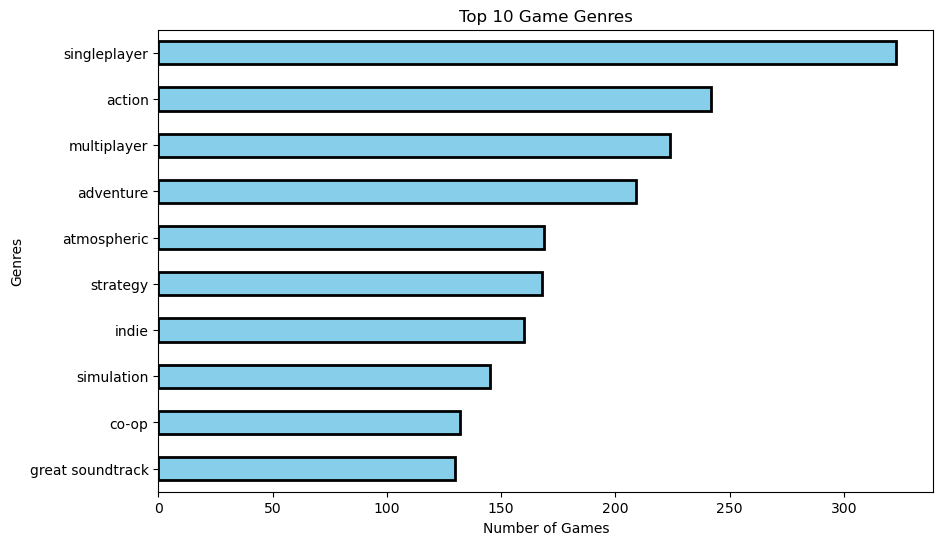

In [9]:
# Select the top 10 categories
top_10_categories = category_counts_sorted.head(10)

# Sort the DataFrame in ascending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='barh', color='skyblue', edgecolor='black', linewidth=2)
plt.title('Top 10 Game Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genres')
plt.show()

In [10]:
## Find the play-time for each category
playtime_df = dflibrary[['id', 'hours']].copy()

# Fill NaN values in the 'hours' column with 0
playtime_df['hours'].fillna(0, inplace=True)

for category in category_columns.columns:
    playtime_df[category] = playtime_df['hours'] * (category_columns[category] == 1)

playtime_df = playtime_df.iloc[:, 2:]
category_sum = playtime_df.sum()
category_sum_df = pd.DataFrame(category_sum[category_sum != 0], columns=['Total_Sum']).sort_values(by='Total_Sum', ascending=False)
print("Most Played Genres(Hours) in Steam-library: ")
display(category_sum_df.head(10))

Most Played Genres(Hours) in Steam-library: 


,Total_Sum
singleplayer,6075.783333
multiplayer,5863.416667
simulation,5583.916667
realistic,4081.316667
free to play,3613.483334
casual,3145.316667
action,2923.316667
sandbox,2871.150000
adventure,2763.950000
sports,2661.866667


<Figure size 1000x600 with 0 Axes>

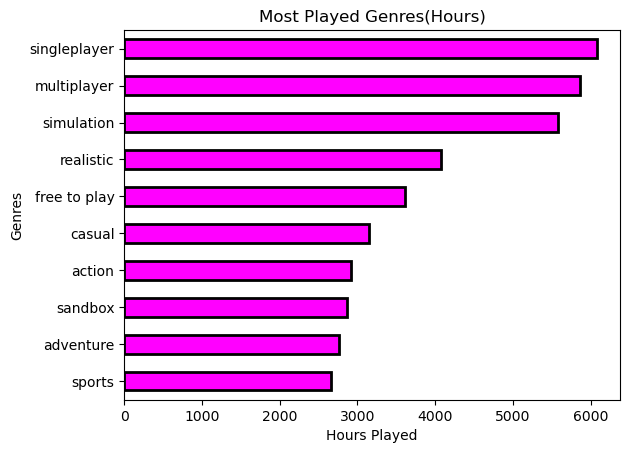

In [11]:
# Select the top 10 categories
top_10_categories = category_sum_df.head(10)

# Sort the DataFrame in ascending order
top_10_categories = top_10_categories.sort_values(by='Total_Sum')

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='barh', color='magenta', edgecolor='black', linewidth=2)
plt.title('Most Played Genres(Hours)')
plt.xlabel('Hours Played')
plt.ylabel('Genres')
plt.legend().set_visible(False)
plt.show()

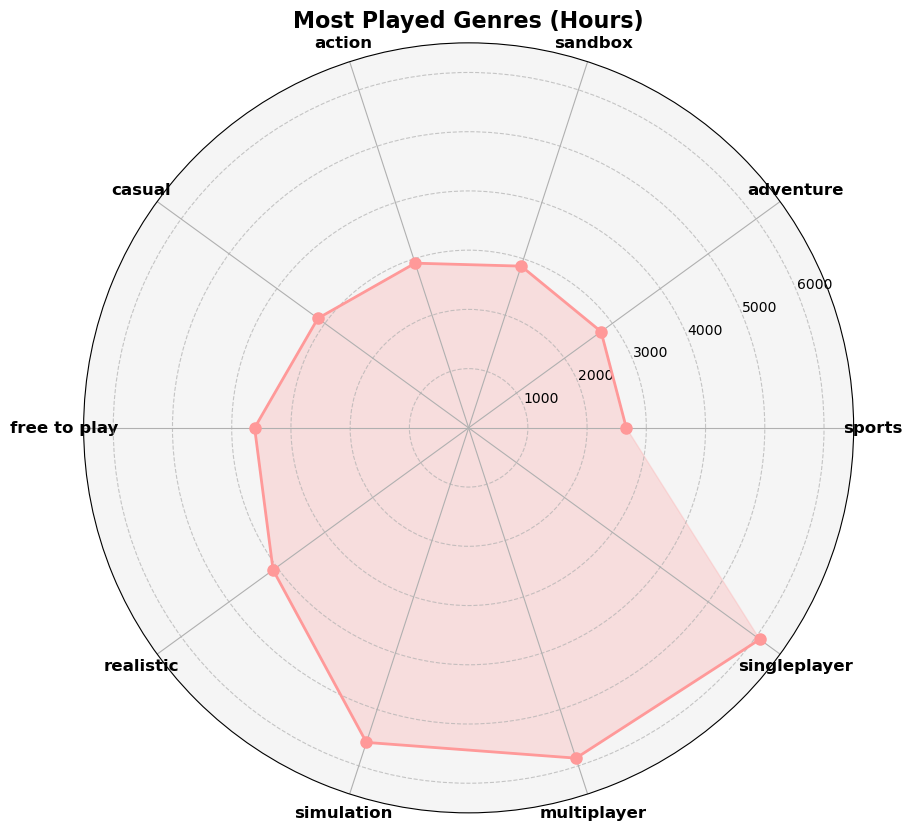

In [12]:
top_10_categories = top_10_categories.sort_values(by='Total_Sum')
# Create a radar chart
plt.figure(figsize=(10, 10))

# Number of categories
num_categories = len(top_10_categories)

# Values and labels for each category
values = top_10_categories['Total_Sum'].values
labels = top_10_categories.index

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Make plot
plt.polar(angles, values, color='#FF9999', linewidth=2, linestyle='solid', marker='o', markersize=8, label='Hours Played')
plt.fill(angles, values, color='#FF9999', alpha=0.25)

# Set labels for each category
plt.xticks(angles, labels, fontsize=12, fontweight='bold', color='black')
plt.ylim(0, 6500)
# Adjust grid lines
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7)

# Set background color
plt.gca().set_facecolor('whitesmoke')


# Set title
plt.title('Most Played Genres (Hours)', fontsize=16, fontweight='bold', color='black')

plt.show()

In [13]:
#Find the most 5 played categories
#(ignoring singleplayer, multiplayer and free to play since there are not specific genres)
exclude_genres = ['singleplayer', 'multiplayer', 'free to play']
category_sum_df = category_sum_df[~category_sum_df.index.isin(exclude_genres)]
display(category_sum_df.head(5))

,Total_Sum
simulation,5583.916667
realistic,4081.316667
casual,3145.316667
action,2923.316667
sandbox,2871.150000


In [14]:
## Find backlogged(purchased but not played) games
# Count the total number of games
total_games = len(dflibrary)

# Count the number of games that haven't been played (hours == 0 or NaN)
unplayed_games = len(dflibrary[dflibrary['hours'].isnull() | (dflibrary['hours'] == 0)])

# Calculate the ratio of unplayed games to total games
unplayed_ratio = unplayed_games / total_games

# Display the results
print(f"Total Games: {total_games}")
print(f"Unplayed Games: {unplayed_games}")
print(f"Ratio of Unplayed Games to Total Games: {unplayed_ratio:.2%}")

Total Games: 387
Unplayed Games: 208
Ratio of Unplayed Games to Total Games: 53.75%


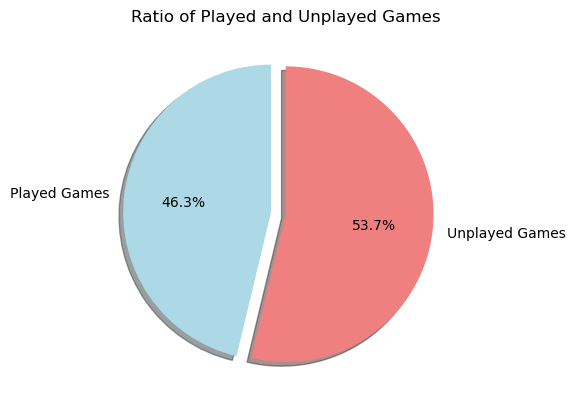

In [15]:
# Calculate the ratio of unplayed games to total games
played_games = len(dflibrary) - unplayed_games
ratios = [played_games, unplayed_games]

# Labels for the two categories
labels = ['Played Games', 'Unplayed Games']

# Colors for each category
colors = ['lightblue', 'lightcoral']

# Explode the 'Played Games' slice
explode = (0.1, 0)

# Adding a shadow effect
shadow = True

# Plotting the pie chart
plt.pie(ratios, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=shadow, startangle=90)

# Adding a title
plt.title('Ratio of Played and Unplayed Games')

# Show the pie chart
plt.show()

In [16]:
##Find the top 3 genres of the unplayed games
# Select unplayed games (where 'hours' is NaN or 0)
unplayed_games = dflibrary[dflibrary['hours'].isnull() | (dflibrary['hours'] == 0)]

# Get the columns representing genres (adjust this based on your dataset)
genre_columns = unplayed_games.iloc[:, 52:]
# List of genres to exclude
exclude_genres = ['singleplayer', 'multiplayer', 'free to play']

# Sum the values for each genre based on 'X' presence, excluding specific genres
genre_sum = ((genre_columns == 1) & ~genre_columns.columns.isin(exclude_genres)).sum()

# Create a DataFrame for the total sum and sort the values
top_genres = pd.DataFrame(genre_sum[genre_sum != 0], columns=['Total_Count']).sort_values(by='Total_Count', ascending=False)

# Display the top 3 genres excluding specific genres
top_5_genres = top_genres.head(5)
print("Top 5 Genres of Unplayed Games (excluding specific genres):")
print(top_5_genres)

Top 5 Genres of Unplayed Games (excluding specific genres):
                  Total_Count
action                    141
adventure                 135
atmospheric               115
story rich                 84
great soundtrack           78


In [17]:
## Correlation between 'General User Rating' - 'Playtime'
# Select only the relevant columns for correlation
correlation_df = dflibrary[['hours', 'userscore']]

# Drop rows with NaN values in either 'hours' or 'userscore'
correlation_df = correlation_df.dropna()

# Calculate the correlation
correlation = correlation_df['hours'].corr(correlation_df['userscore'])

print("Correlation between 'Playtime' and 'General User Rating':", round(correlation,5))

Correlation between 'Playtime' and 'General User Rating': -0.06334


In [18]:
dflibrary['hours'].fillna(0, inplace=True)

# Group by the 'hours' column and calculate the average userscore for each group
average_userscore_by_hours = dflibrary.groupby('hours')['userscore'].mean()

# Average userscore for games with zero hours
average_userscore_zero_hours = average_userscore_by_hours.loc[0.0] if 0.0 in average_userscore_by_hours.index else None

# Average userscore for games with non-zero hours
average_userscore_nonzero_hours = average_userscore_by_hours.loc[average_userscore_by_hours.index != 0.0].mean()

print("Average General User Rating for unplayed games:", round(average_userscore_zero_hours, 2))
print("Average General User Rating for played games:", round(average_userscore_nonzero_hours, 2))

Average General User Rating for unplayed games: 82.89
Average General User Rating for played games: 84.09


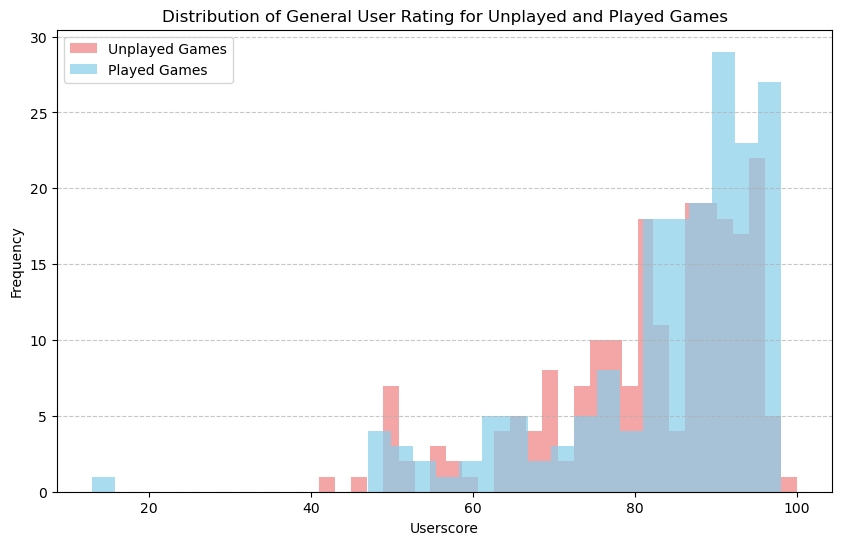

In [19]:
# Plotting histograms
plt.figure(figsize=(10, 6))

# Fill NaN values in the 'userscore' column with a neutral value, say 50
dflibrary['userscore'].fillna(50, inplace=True)

# Separate games with zero hours and non-zero hours
unplayed_games_userscore = dflibrary[dflibrary['hours'] == 0]['userscore']
played_games_userscore = dflibrary[dflibrary['hours'] > 0]['userscore']

# Plotting histograms
plt.hist(unplayed_games_userscore, bins=30, alpha=0.7, color='lightcoral', label='Unplayed Games')
plt.hist(played_games_userscore, bins=30, alpha=0.7, color='skyblue', label='Played Games')

# Adding labels and title
plt.xlabel('Userscore')
plt.ylabel('Frequency')
plt.title('Distribution of General User Rating for Unplayed and Played Games')

# Adding a legend
plt.legend()

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

In [20]:
## Correlation between 'Populartiy of a game' - 'Playtime'
# Select only the relevant columns for correlation
correlation_df = dflibrary[['hours', 'userscore_count']]

# Fill NaN values with zeros
correlation_df.fillna(0, inplace=True)

# Calculate the correlation
correlation = correlation_df['hours'].corr(correlation_df['userscore_count'])

print("Correlation between 'Playtime' and 'Popularity':", round(correlation, 5))

Correlation between 'Playtime' and 'Popularity': 0.10283


In [21]:
dflibrary['hours'].fillna(0, inplace=True)

# Group by the 'hours' column and calculate the average userscore for each group
average_userscorec_by_hours = dflibrary.groupby('hours')['userscore_count'].mean()

# Average userscore for games with zero hours
average_userscorec_zero_hours = average_userscorec_by_hours.loc[0.0] if 0.0 in average_userscorec_by_hours.index else None

# Average userscore for games with non-zero hours
average_userscorec_nonzero_hours = average_userscorec_by_hours.loc[average_userscorec_by_hours.index != 0.0].mean()

print("Average popularity for unplayed games:", round(average_userscorec_zero_hours, 2))
print("Average popularity for played games:", round(average_userscorec_nonzero_hours, 2))

Average popularity for unplayed games: 45782.13
Average popularity for played games: 150991.57


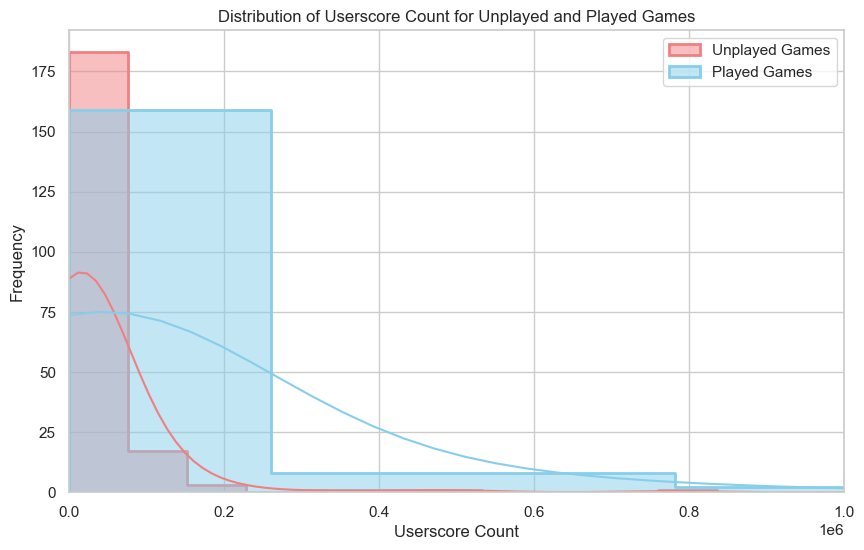

In [22]:
# Fill NaN values in the 'userscore_count' column with a neutral value, say 0
dflibrary['userscore_count'].fillna(0, inplace=True)

# Separate games with zero hours and non-zero hours
unplayed_games_userscore_count = dflibrary[dflibrary['hours'] == 0]['userscore_count']
played_games_userscore_count = dflibrary[dflibrary['hours'] > 0]['userscore_count']

# Set a seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plotting histograms with a beautiful style
sns.histplot(unplayed_games_userscore_count, bins=30, kde=True, color='lightcoral', label='Unplayed Games', element='step', linewidth=2)
sns.histplot(played_games_userscore_count, bins=30, kde=True, color='skyblue', label='Played Games', element='step', linewidth=2)

# Set x-axis range
plt.xlim(0, 1e6)

# Adding labels and title
plt.xlabel('Userscore Count')
plt.ylabel('Frequency')
plt.title('Distribution of Userscore Count for Unplayed and Played Games')

# Adding a legend
plt.legend()

# Show the histogram
plt.show()

In [23]:
## Machine Learning Part
# Data Preprocessing
# Drop unnecessary columns and handle NaN values
dflibrary_cleaned = dflibrary.iloc[:, list(range(1, 8)) + list(range(53, len(dflibrary.columns)))].copy()

# Fill NaN values in numerical columns with mean or other suitable values
dflibrary_cleaned.fillna(dflibrary_cleaned.mean(), inplace=True)

# Ensure all columns are numeric
dflibrary_cleaned = dflibrary_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop unnecessary columns and handle NaN values
dfwishlist_cleaned = dfwishlist.iloc[:, list(range(1, 3)) + list(range(40, len(dfwishlist.columns)))].copy()

# Fill NaN values in numerical columns with mean or other suitable values
dfwishlist_cleaned.fillna(dfwishlist_cleaned.mean(), inplace=True)

# Ensure all columns are numeric
dfwishlist_cleaned = dfwishlist_cleaned.apply(pd.to_numeric, errors='coerce')

#Find matching columns to create a model
matching_columns = dflibrary_cleaned.columns.intersection(dfwishlist_cleaned.columns)
dflibrary_cleaned = dflibrary_cleaned[matching_columns]
dfwishlist_cleaned = dfwishlist_cleaned[matching_columns]

display(dflibrary_cleaned.head(20))
display(dfwishlist_cleaned)

,id,hours,2d,2d fighter,2d platformer,3d,3d platformer,4x,action,action roguelike,...,transportation,turn-based,turn-based combat,turn-based strategy,turn-based tactics,violent,visual novel,war,world war ii,zombies
0,435790,0.000000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,278360,0.000000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,672630,8.783333,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1385380,8.550000,1,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
4,346900,2.283333,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,462930,0.016667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,371140,0.000000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,314970,7.250000,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
8,226840,1.100000,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
9,203290,0.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


,id,hours,2d,2d fighter,2d platformer,3d,3d platformer,4x,action,action roguelike,...,transportation,turn-based,turn-based combat,turn-based strategy,turn-based tactics,violent,visual novel,war,world war ii,zombies
0,589360,58.016,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8980,39.383,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,427520,98.766,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,526870,154.666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,614570,12.005,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,686810,95.667,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
7,700820,8.000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,798460,57.567,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
9,814000,46.100,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,949230,182.300,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
# Model Training
X = dflibrary_cleaned.drop('hours', axis=1)
y = dflibrary_cleaned['hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

In [25]:
# Model Testing
# Assuming 'genre' is the target variable to predict in dfwishlist_cleaned
X_wishlist = dfwishlist_cleaned.drop(['hours'], axis=1)

# Use the trained model to predict total playtime for the wishlist
wishlist_predictions = model.predict(X_wishlist)

# Add the predictions to dfwishlist_cleaned
dfwishlist_cleaned['predicted_hours'] = abs(wishlist_predictions)

# Evaluate the model
mse = mean_squared_error(dfwishlist_cleaned['hours'], dfwishlist_cleaned['predicted_hours'])
print("Mean Squared Error: ", round(mse, 2), "\n")

# Assuming df is your DataFrame containing "hours" and "predicted_hours" columns
correlation = dfwishlist_cleaned['hours'].corr(dfwishlist_cleaned['predicted_hours'])

# Print the correlation value
print("Correlation between 'hours' and 'predicted_hours':", correlation, "\n")

# Display the predictions
print(dfwishlist_cleaned[['id', 'hours', 'predicted_hours']])

Mean Squared Error:  20261.34 

Correlation between 'hours' and 'predicted_hours': 0.5559293784367941 

         id    hours  predicted_hours
0    589360   58.016       218.010555
1      8980   39.383        39.438889
2    427520   98.766        19.927377
3    526870  154.666       124.809184
4    614570   12.005        51.428703
6    686810   95.667       110.355112
7    700820    8.000        70.048956
8    798460   57.567        61.093543
9    814000   46.100       257.356113
10   949230  182.300        24.932090
11   973580   14.800        77.144138
12  1009560   68.250        39.970160
13  1066780   62.016        83.164906
14  1086940  108.933       227.535149
15  1113000  185.450       672.359904
16  1144200   60.783       168.446972
17  1158310  174.733       546.973828
19  1297790    7.667        28.582057
20  1342330   29.300       312.020076
21  1382330   46.500        75.659532
22  1457080  112.383       218.831703
23  1462570  116.433       242.938664
24  1605220   16.034  

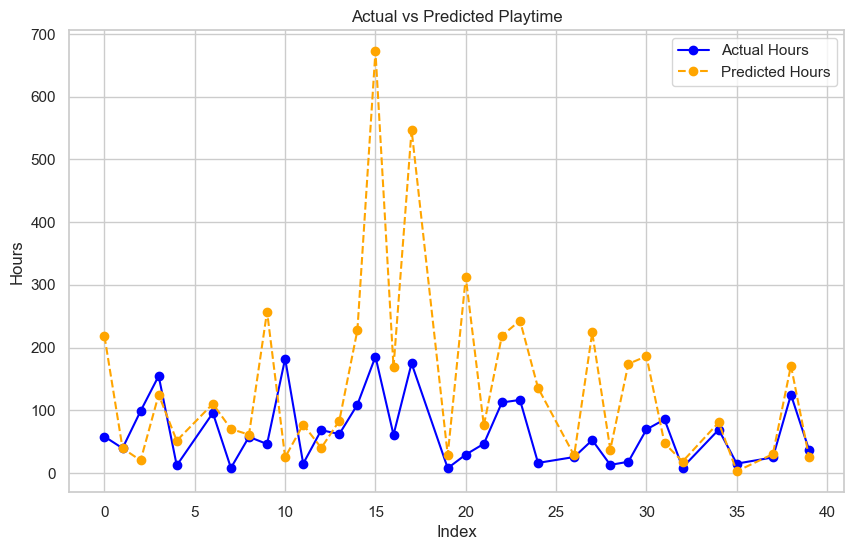

In [26]:
# Graphs of the predictions
# Plot 'hours' and 'predicted_hours' with different colors
plt.figure(figsize=(10, 6))
plt.plot(dfwishlist_cleaned.index, dfwishlist_cleaned['hours'], label='Actual Hours', marker='o', linestyle='-', color='blue')
plt.plot(dfwishlist_cleaned.index, dfwishlist_cleaned['predicted_hours'], label='Predicted Hours', marker='o', linestyle='--', color='orange')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Hours')
plt.title('Actual vs Predicted Playtime')
plt.legend()

# Show the plot
plt.show()

In [27]:
# Data Preprocessing again to make fitting for this model
# Drop unnecessary columns and handle NaN values
dflibrary_cleaned = dflibrary.iloc[:, list(range(1, 8)) + list(range(53, len(dflibrary.columns)))].copy()

# Fill NaN values in numerical columns with mean or other suitable values
dflibrary_cleaned.fillna(dflibrary_cleaned.mean(), inplace=True)

# Ensure all columns are numeric
dflibrary_cleaned = dflibrary_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop unnecessary columns and handle NaN values
dfwishlist_cleaned = dfwishlist.iloc[:, list(range(1, 3)) + list(range(40, len(dfwishlist.columns)))].copy()

# Fill NaN values in numerical columns with mean or other suitable values
dfwishlist_cleaned.fillna(dfwishlist_cleaned.mean(), inplace=True)

# Ensure all columns are numeric
dfwishlist_cleaned = dfwishlist_cleaned.apply(pd.to_numeric, errors='coerce')

#Find matching columns to create a model
matching_columns = dflibrary_cleaned.columns.intersection(dfwishlist_cleaned.columns)
dflibrary_cleaned = dflibrary_cleaned[matching_columns]
dfwishlist_cleaned = dfwishlist_cleaned[matching_columns]

Mean Squared Error on the test set:  4330.15 

Correlation between 'hours' and 'predicted_hours': 0.556743366833445 

         id    hours  predicted_hours
0    589360   58.016         2.438500
1      8980   39.383         3.165833
2    427520   98.766         1.408167
3    526870  154.666         1.120167
4    614570   12.005         2.963167
6    686810   95.667         4.766167
7    700820    8.000         3.424000
8    798460   57.567         1.711667
9    814000   46.100         2.928167
10   949230  182.300        52.024667
11   973580   14.800         8.784000
12  1009560   68.250       264.282833
13  1066780   62.016        52.933000
14  1086940  108.933        93.969167
15  1113000  185.450       226.786000
16  1144200   60.783        12.610167
17  1158310  174.733       288.883167
19  1297790    7.667        21.277167
20  1342330   29.300        65.818000
21  1382330   46.500         3.133833
22  1457080  112.383         9.533167
23  1462570  116.433        62.616167
24  1605

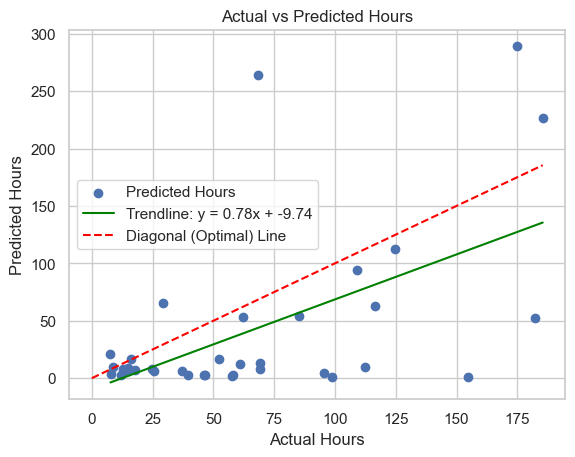

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=48)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Use the trained model to predict hours for dfwishlist
X_wishlist = dfwishlist_cleaned.drop('hours', axis=1)
wishlist_predictions = model.predict(X_wishlist)

# Add the predictions to dfwishlist
dfwishlist_cleaned['predicted_hours'] = wishlist_predictions

# Evaluate the model
mse = mean_squared_error(dfwishlist_cleaned['hours'], dfwishlist_cleaned['predicted_hours'])
print("Mean Squared Error on the test set: ", round(mse, 2), "\n")

# Assuming df is your DataFrame containing "hours" and "predicted_hours" columns
correlation = dfwishlist_cleaned['hours'].corr(dfwishlist_cleaned['predicted_hours'])

# Print the correlation value
print("Correlation between 'hours' and 'predicted_hours':", correlation, "\n")

# Display the predictions
print(dfwishlist_cleaned[['id', 'hours', 'predicted_hours']])

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(dfwishlist_cleaned[['hours']], dfwishlist_cleaned['predicted_hours'])

# Get the slope (m) and y-intercept (b)
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the trendline values
trendline_x = np.array([min(dfwishlist_cleaned['hours']), max(dfwishlist_cleaned['hours'])])
trendline_y = slope * trendline_x + intercept

# Visualize the predicted vs actual hours
plt.scatter(dfwishlist_cleaned['hours'], dfwishlist_cleaned['predicted_hours'], label='Predicted Hours')
plt.plot(trendline_x, trendline_y, color='green', label=f'Trendline: y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.plot([0, max(dfwishlist_cleaned['hours'])], [0, max(dfwishlist_cleaned['hours'])], linestyle='--', color='red', label='Diagonal (Optimal) Line')
plt.xlabel("Actual Hours")
plt.ylabel("Predicted Hours")
plt.title("Actual vs Predicted Hours")
plt.legend()
plt.show()

In [29]:
display(dfwishlist_cleaned)

,id,hours,2d,2d fighter,2d platformer,3d,3d platformer,4x,action,action roguelike,...,turn-based,turn-based combat,turn-based strategy,turn-based tactics,violent,visual novel,war,world war ii,zombies,predicted_hours
0,589360,58.016,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.438500
1,8980,39.383,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.165833
2,427520,98.766,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.408167
3,526870,154.666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.120167
4,614570,12.005,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.963167
6,686810,95.667,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,4.766167
7,700820,8.000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.424000
8,798460,57.567,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1.711667
9,814000,46.100,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.928167
10,949230,182.300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.024667


In [30]:
playtime_df = dfwishlist_cleaned[['id', 'hours']].copy()

# Fill NaN values in the 'hours' column with 0
playtime_df['hours'].fillna(0, inplace=True)

for category in category_columns.columns:
    playtime_df[category] = playtime_df['hours'] * (category_columns[category] == 1)

playtime_df = playtime_df.iloc[:, 2:]
category_sum = playtime_df.sum()
category_sum_df = pd.DataFrame(category_sum[category_sum != 0], columns=['Total_Sum']).sort_values(by='Total_Sum', ascending=False)
print("Most Played Genres(Hours) in Steam-wishlist: ")
display(category_sum_df.head(10))

Most Played Genres(Hours) in Steam-wishlist: 


,Total_Sum
singleplayer,1787.803
action,1644.866
multiplayer,1338.800
co-op,1222.732
strategy,1164.069
adventure,1090.789
rpg,1068.818
sandbox,873.981
first-person,853.483
open world,852.699
